<font face="B Mitra" size=4>
<div dir=rtl align=center>

<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">

<br>
<font size=2>
<b>دانشگاه صنعتی امیرکبیر - دانشکده ریاضی و علوم کامپیوتر</b>
</font>

<br>
<font size=6>
<b>مقدمه‌ای بر پردازش تصویر</b>
</font>

<br>
<hr/>
<font size=6>
<b>کارگاه چهارم </b>
</font>

<br>
استاد: دکتر مصطفی شمسی



<hr>
</div>
</font>



<font face="B Mitra" size=5>
<div dir=rtl>
کتابخانه های پیشنهادی:
<hr>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import turtle
from google.colab.patches import cv2_imshow # For displaying image in Google Colab
from PIL import Image

<font face="B Mitra" size=6>
<div dir=rtl>
<p>
تصویر MRIو فایل dcmباید در فولدر content آپلود شود

</div>
</font>

<font face="B Mitra" size=5>
<div dir=rtl>

<br>
<p align="justify">
<font size=6>
<h2>Region Grwoing</h2>
<font size=4>
</font>
<p>
region growing یک روش تقسیم بندی بسیار محبوب است. از مراحل زیر تشکیل شده است:

(1)
انتخاب یک دانه، یعنی یک پیکسل اولیه. این مرحله به دو صورت قابل انجام است:

   - به صورت تعاملی (کاربر دانه را انتخاب می کند)

     
    

   -  به طور خودکار: دانه به طور تصادفی انتخاب می شود

(2) یک معیار شباهت بین دو پیکسل انتخاب کنید.

    
(3) پیکسل‌های مشابه همسایه‌اش را جمع کنید، و در نتیجه اولین ناحیه R1 ایجاد می‌شود.

    
(4)  یک معیار شباهت بین یک پیکسل و یک منطقه انتخاب کنید.

   
(5)  پیکسل‌های مشابه همسایه‌اش (یعنی متعلق به مرز خارجی آن) را در R1 جمع کنید، که منجر به ایجاد یک منطقه R2⊃R1 می‌شود.

   
(6) این فرآیند را تا زمانی ادامه دهید که پیکسل های بیشتری نتوانند جمع شوند.

   
</p>
<hr>

<hr>
<font face="B Mitra" size=5>
<div dir=rtl>

<font size=6>
<b>تمرین اول</b>
</font>

<br>
<p align="justify">
<font size=4>
<p>  در این تمرین قصد داریم عملیات بخش بندی تصویر را با استفاده از region growing (که پیش‌تر توضیح داده شد) پیاده سازی کنیم. بدین منظور قصد داریم ماده سفید مغز و ماده خاکستری مغز را از پس زمینه جدا کنیم        </p>

</p>

<p>
<font size=4>

</font>
</p>

</div>
</font>

<font face="B Mitra" size=5>
<div dir=rtl>

<br>
<p align="justify">
<font size=4>

<font size=4>
</font>
<p>
1.1 تصویر Color_MRI.png را بخوانید(در فایل زیپ) و به طیف خاکستری ببرید.
</p>



<font size=4>

<p>
۲.۱ دو نقطه به عنوان دانه، یکی در قسمت ماده سفید مغز و دیگری در قسمت ماده خاکستری مغز انتخاب کنید. یک تصویر خالی با ابعاد تصویر خاکستری خوانده شده تعریف کنید و نقاط دانه را روی آن با مقادیر مختلف مشخص کنید.
</p>
</font>


<font size=4>

<p>
۳.۱ تابع region growing را به گونه ای تعریف کنید که دو تا از ورودی هایش " مقدار اختلاف از سطح آستانه " و دیگری رشته ای  که نشان دهنده  
" نوع محاسبه سطح آستانه " باشد. برای نوع محاسبه سطح آستانه  یکی از دو مدل زیر انتخاب کنید.

الف)ثابت: سطح آستانه در تمام تکرا رها یکسان و برابر مقدار شدت در نقطه دانه  میباشد.


ب) متغیر: سطح آستانه در هر تکرار مجددا محاسبه می شود که برابر است با میانگین شدتهای تمام نقاط
درون بخش
</p>


<font size=4>

<p>
  ۴.۱ با کرنل + الگوریتم region growing را روی تصویر خالی اعمال کنید.
تابع region growing را با نوع سطح آستانه ای که انتخاب کردید، به تعدادی روی تصویر اعمال کنید تا پیکسلهای هر بخش را بخش بندی کند.
</p>


<font size=4>
<p>





<p font="Mitra">
</p>
۵.۱ تعداد دفعات تکرار را محاسبه و چاپ کنید. تصویر اصلی و تصویر بخشبندی شده را به صورت استاندارد نمایش دهید و تحلیل کنید.
</p>
</b>

</div>
</font>


<hr>

</div>
</font>

<font face="B Mitra" size=4>
<div dir=rtl>
<p>
<h2> روند حل مسئله </h2>

در ابتدا دو نقطه را به صورت چشمی یکی از ناحیه سفید و دیگری از ناحیه خاکستری به عنوان دانه انتخاب کنید.

برای نمایش این دو نقطه بدلیل اینکه بسیار ریز هستند باید با کمک تابع cv.circle دایره ای اطراف آنها با شدت برابر با همان نقاط نمایش دهید.

نمونه کدی برای تعریف تابع region growing  در زیر آمده است که میتوانید از آن استفاده کنید.

کافی است برای دستیابی به خروجی تابع region growing را فراخوانی کرده و ورودی های مناسب به آن بدهید و در نهایت خروجی های مورد نظر را نمایش دهید و مقادیر step برای هرکدام از ناحیه سفید و ناحیه خاکستری را چاپ کنید.
</div>
</font>

<font face="B Mitra" size=4>
<div dir=rtl>
<p>
<b>
<h2> توضیح عملکرد تابع (سلول پایین)</h2>
</b>
ابعاد تصویر با استفاده از img.shape استخراج شده و در متغیرهای ارتفاع و وزن ذخیره می شود.

آرایه ای به نام seedMark با همان سایز تصویر ورودی ایجاد می شود و با صفر پر می شود. این آرایه برای علامت گذاری پیکسل های متعلق به منطقه تقسیم شده استفاده می شود.

یک لیست خالی به نام seedList برای ذخیره نقاط بذر برای منطقه در حال رشد مقداردهی اولیه می شود.

یک لیست خالی به نام seedList برای ذخیره نقاط seed برای منطقه در حال رشد مقداردهی اولیه می شود.
متغیرها seeds_grayscale، steps, main_grayscale، و seeds_avg_grayscale به مقادیر مناسب، مشابه توضیحات قبلی مقداردهی اولیه می شوند.

یک حلقه برای تکرار روی هر نقطه در لیست دانه ها استفاده می شود. نقاط دانه به seedList اضافه می شوند و مقادیر خاکستری مربوطه از تصویر ورودی به لیست seeds_grayscale اضافه می شوند.

میانگین مقدار خاکستری نقاط بذر با استفاده از np.average(seeds_greyscale) و inseeds_avg_grayscale ذخیره شده محاسبه می شود.

لیست connect  با مختصات نسبی تعریف شده است که نشان دهنده پیکسل های همسایه (بالا، راست، پایین، چپ) مورد استفاده برای اتصال در فرآیند رشد منطقه است.

از حلقه while برای تکرار استفاده می شود تا زمانی که هیچ seed ای در seedList باقی نماند. این حلقه هر seed را پردازش می کند. در داخل حلقه، اولین Seed Point از seedList با استفاده از seedList.pop(0) حذف شده و در currentPoint ذخیره می شود.

اگر diffType "میانگین" باشد، مقدار مقیاس خاکستری فعلی Point از img استخراج می شود و به seeds_grayscale اضافه می شود. سپس، مقدار متوسط ​​مقیاس خاکستری با استفاده از np.average (seeds_grayscale) مجدداً محاسبه می‌شود و در seeds_avg_grayscale ذخیره می‌شود. در نهایت، به پیکسل مربوطه در seedMark مقدار برچسب اختصاص داده می شود تا آن را به عنوان بخشی از منطقه تقسیم شده علامت گذاری کند.

اگر diffType "ثابت" باشد، میانگین مقیاس خاکستری با استفاده از main_grayscale (متوسط ​​محاسبه شده قبلی) محاسبه می شود و در seeds_avg_grayscale ذخیره می شود. به پیکسل مربوطه در seedMark مقدار برچسب اختصاص داده می شود.

حلقه for برای تکرار بر روی چهار مختصات همسایه (بالا، راست، پایین، چپ) تعریف شده در لیست اتصالات استفاده می شود.

در داخل حلقه for، متغیرهای موقت tmpX و tmpY با اضافه کردن مختصات همسایه فعلی به currentPoint محاسبه می‌شوند.

اگر مختصات موقت tmpX یا tmpY خارج از مرزهای تصویر باشند، حلقه به تکرار بعدی ادامه میدهد.

تفاوت مطلق بین مقدار مقیاس خاکستری پیکسل موقت در img و seeds_avg_grayscale محاسبه و در grayDiff ذخیره می شود.

اگر grayDiff کوچکتر از  آستانه باشد و پیکسل مربوطه در seedMark قبلاً برچسب گذاری نشده باشد (seedMark[tmpX,tmpY] == 0)، به پیکسل موقت مقدار برچسب در seedMark اختصاص داده می شود. علاوه بر این، پیکسل موقت برای رشد بیشتر منطقه به seedList اضافه می شود.

متغیر step برای پیگیری تعداد گام های برداشته شده در روند رشد منطقه افزایش می یابد.



</div>
</font>

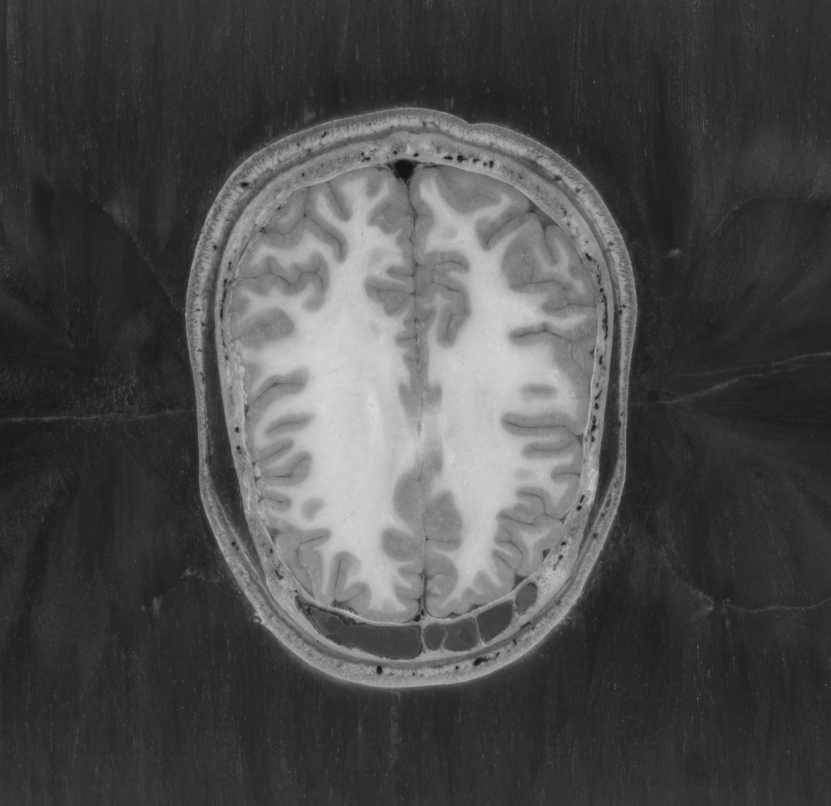

(806, 831)


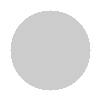

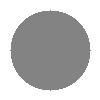

In [9]:
img = cv2.imread('/content/Color_MRI.png')
grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale_img)
print(grayscale_img.shape)
white_part = cv2.circle(np.full((100,100),255,np.uint16),(50,50),40,int(grayscale_img[350,500]),cv2.FILLED)
cv2_imshow(white_part)
gray_part = cv2.circle(np.full((100,100),255,np.uint16),(50,50),40,int(grayscale_img[500,400]),cv2.FILLED)
cv2_imshow(gray_part)

In [10]:
def region_growing(img, seeds, thresh, diffType,label):
    height, weight = img.shape
    seedMark = np.zeros(img.shape)
    seedList = []
    steps = 1
    seeds_grayscale = []
    main_grayscale=seeds_grayscale
    seeds_avg_grayscale = 0


    for seed in seeds:
        seedList.append(seed)
        seeds_grayscale.append(img[seed[0], seed[1]])
    seeds_avg_grayscale = np.average(seeds_grayscale)

    connects = [ (0, -1), (1, 0),(0, 1), (-1, 0)]
    while(len(seedList)>0):
        currentPoint = seedList.pop(0)


        if (diffType == "average"):
            seeds_grayscale.append(img[currentPoint[0], currentPoint[1]])
            seeds_avg_grayscale = np.average(seeds_grayscale)
            seedMark[currentPoint[0], currentPoint[1]] = label

        if(diffType=="constant"):
            seeds_avg_grayscale =np.average(main_grayscale)
            seedMark[currentPoint[0], currentPoint[1]] = label

        for i in range(4):
            tmpX = currentPoint[0] + connects[i][0]
            tmpY = currentPoint[1] + connects[i][1]
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
                continue

            grayDiff = abs (img[tmpX, tmpY] - seeds_avg_grayscale)

            if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
                seedMark[tmpX,tmpY] = label
                seedList.append((tmpX,tmpY))
        steps +=1

    print(diffType," ",steps)
    return seedMark

#region_growing()

constant   58228


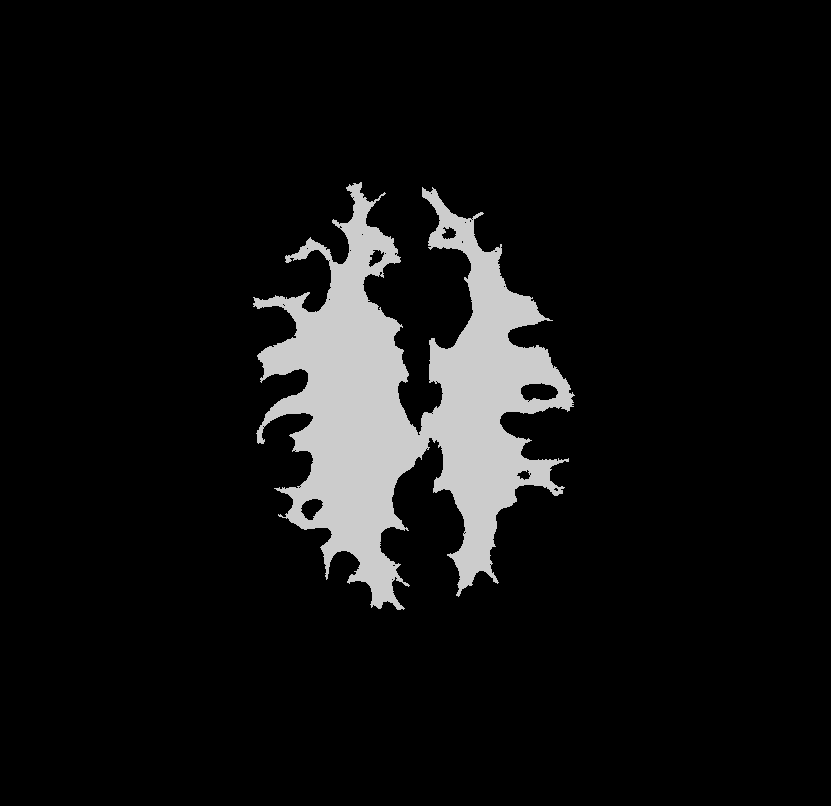

In [11]:
white_img_constant = region_growing(grayscale_img,[(350,500)],35,'constant',int(grayscale_img[350,500]))

cv2_imshow(white_img_constant.astype('uint8'))


average   69863


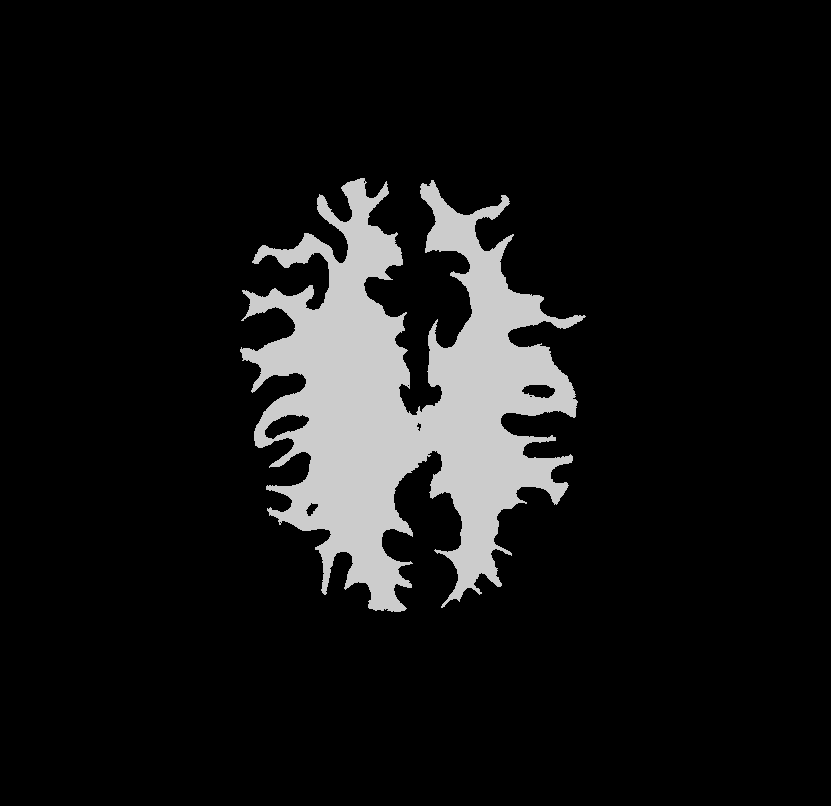

In [34]:
segmented_img1 = region_growing(grayscale_img,[(350,500)],35,'average',int(grayscale_img[350,500]))
cv2_imshow(segmented_img1.astype('uint8'))

constant   119151


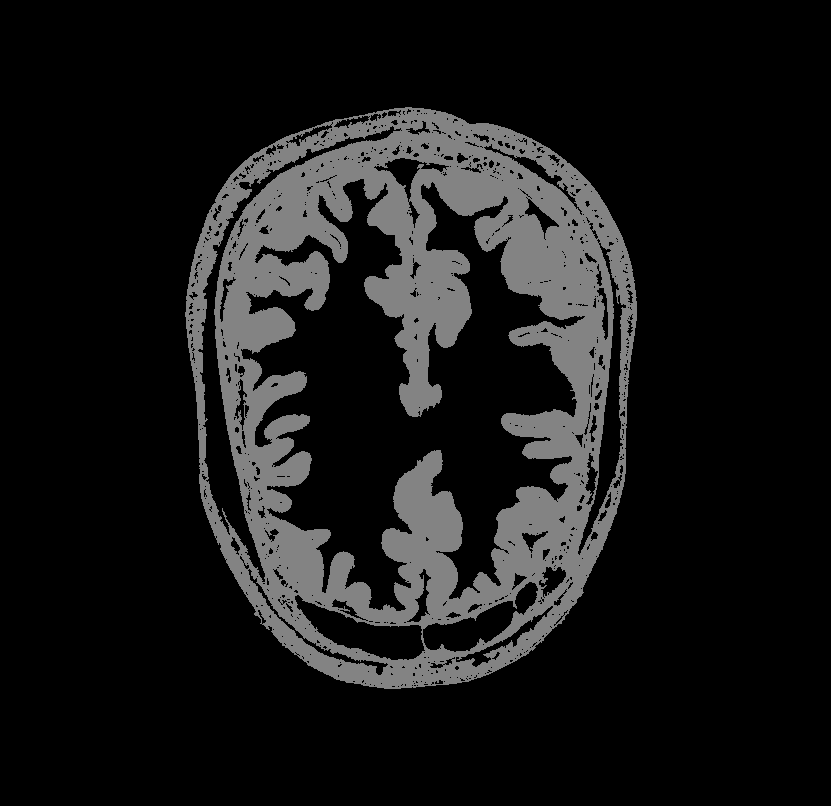

In [16]:
grey_img_constant = region_growing(grayscale_img,[(500,400)],30,'constant',int(grayscale_img[500,400]))
cv2_imshow(grey_img_constant.astype('uint8'))

average   120964


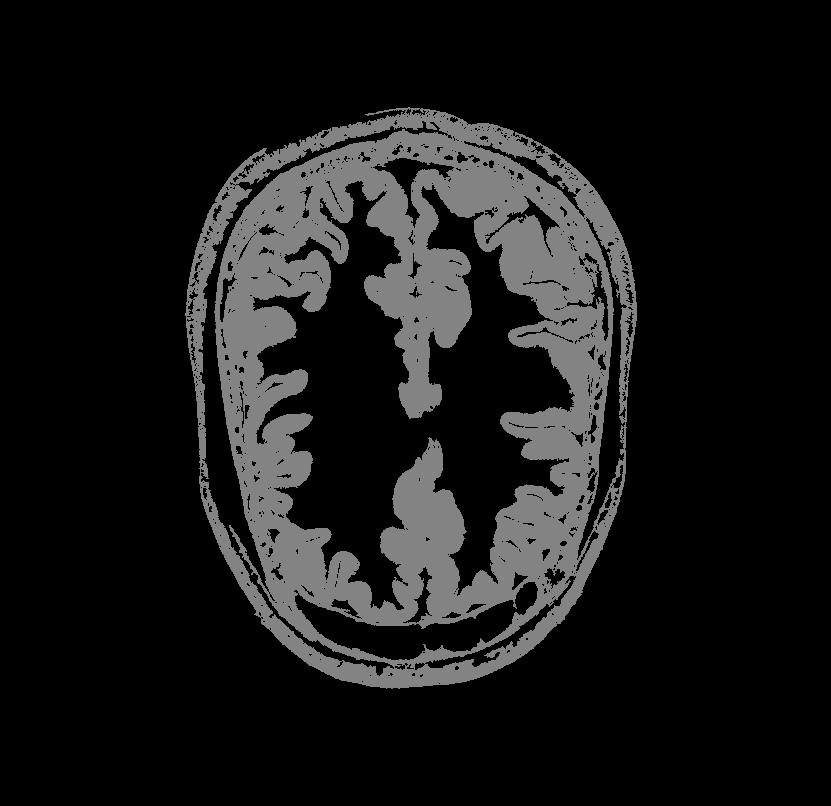

In [15]:
grey_img_average = region_growing(grayscale_img,[(500,400)],30,'average',int(grayscale_img[500,400]))
cv2_imshow(grey_img_average.astype('uint8'))

<font face="B Mitra" size=6>
<div dir=rtl>
<p>
<h2>مقایسه </h2>
به ترتیب از بالا به پایین:

ماده سفید مغز با روش constant threshholding

ماده سفید مغز با روش average threshholding

ماده خاکستری مغزی با روش constant threshholding

ماده خاکستری مغز با روش average threshholding

با استفاهد از constant threshholding بسیار سریعتر به جواب می‌رسیم و دقت قابل قبولی هم دارد
در average threshholding پیچیدگی محاسباتی بیشتری داریم و زمان اجرا بالاتر است و دقیقتر عمل می‌کند.
تعداد steps برای تشکیل هر کدام از بخش‌ها در بالا تصویر آمده است.
</div>
</font>

<hr>
<div dir=rtl>

<h3><font face="B Mitra" size=5><b>خروجی مورد انتظار:</b></font></h3>

<font face="B Mitra" size=4>
خروجی مورد انتظار را می‌توانید در تصویر زیر مشاهده بکنید.
</font>

<img src="https://i.ibb.co/Rz37Mrr/output.png"  width="80%"/>

<div dir=rtl>
<font face="B Mitra" size=6>
لینک‌های مفید
</font>
<ul>
<li><a href="https://sbme-tutorials.github.io/2019/cv/notes/6_week6.html">Region Growing چگونه کار می‌کند</a></li>
</ul>
</div>


<hr>
<font face="B Mitra" size=5>
<div dir=rtl>

<font size=6>
<b>تمرین دوم </b>
</font>

<br>
<p align="justify">
<font size=4>
<p>  در این تمرین قصد داریم سه روش مختلف interpolation یعنی nearest neighborhood , bilinear, bicubic را باهمدیگر مقایسه کنیم.
</p>

<p>
<font size=4>

</font>
</p>

</div>
</font>

<hr>
<font face="B Mitra" size=5>
<div dir=rtl>
کتابخانه های پیشنهادی:


In [24]:
pip install pydicom

In [25]:
# pydicom
from pydicom import dcmread
import cv2

<hr>
<font face="B Mitra" size=5>
<div dir=rtl>

<br>
<p align="justify">
<font size=4>

<font size=4>
</font>
<p>
1.2 از فایل file1.dcm تصویر را بخوانید. (قرار داده شده در فایل زیپ)
</p>



<font size=4>
<p>
۲.2 تعداد بیت های اختصاص داده (برای هر پیکسل)، تعداد بیت های ذخیره شده (برای هر پیکسل) و دسته بندی روش تصویر برداری و بخشی از بدن که از آن تصویر برداری شده است را استخراج و در خروجی چاپ کنید.
</p>
</font>


<font size=4>

<p>
۳.2 با نمونه کاهی (downsample) تعداد پیکسل هارا در جهت محور x به 1/4 و در جهت محور y به 1/2 کاهش دهید.
</p>


<font size=4>

<p>
۴.2 به کمک کتابخانه OpenCv و با روش های نزدیک ترین همسایه، دوخطی و دومکعبی تصویر بخش پیش را به ابعاد اولیه
بازگردانید، نمایش دهید و در مورد تفاوت نتیجه ی هرکدام بحث کنید

</p>


<font size=4>
<p>
<h2>  ۵.2 (سوال امتیازی) </h2>





<p font="Mitra"> تصویر را به فرمت های tif . و bmp . ذخیره کنید
</p>
</p>
</b>

</div>
</font>

<hr>

<font face="B Mitra" size=4>
<div dir=rtl>
<p>
<h2> روند حل مسئله </h2>
ابتدا با کمک کتابخانه معرفی شده فرمت dcm را میخوانیم و اطلاعات آن را بیرون میکشیم. برای مراحل بعدی یعنی نمونه کاهی و درونیابی میتوانید از دستورات آماده کتابخانه cv2 استفاده کنید.

</div>
</font>

<div dir=rtl>
<font face="B Mitra" size=6>
لینک‌های مفید
</font>
<ul>
<li><a href="https://www.kaggle.com/code/micheldc55/how-to-read-dcm-dicom-data">نحوه خواندن فرمت .DCM</a></li>
</ul>
</div>


Bits Allocated: 16
Bits Stored: 12
Modality: CT
Body Part Examined: CHEST


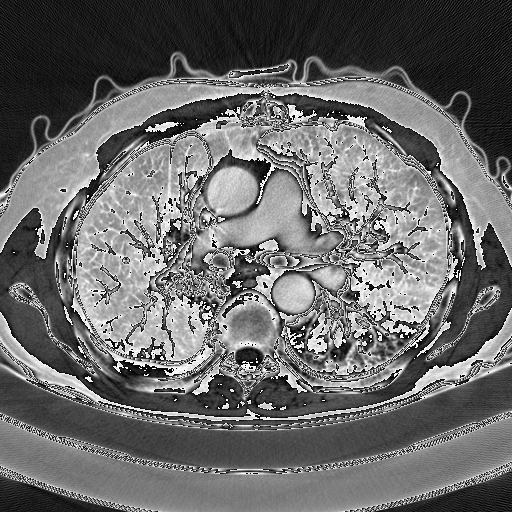

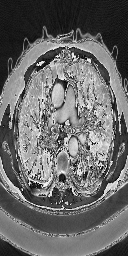

(512, 512)
(256, 128)


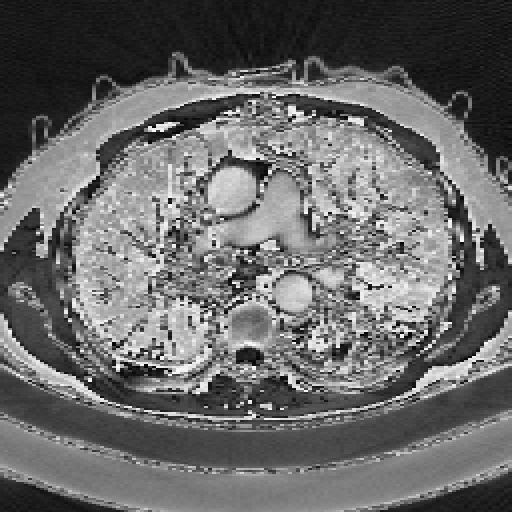

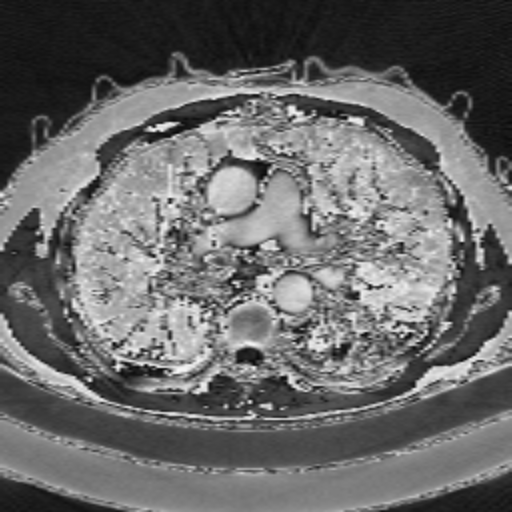

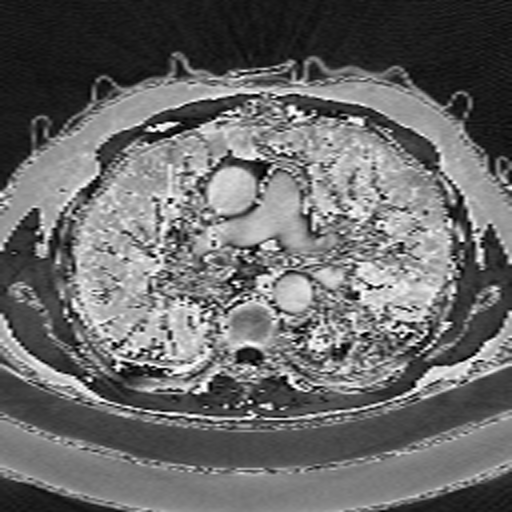

In [27]:
dcm_img = dcmread('/content/file1.dcm', force=True)
print("Bits Allocated:", dcm_img.BitsAllocated)
print("Bits Stored:", dcm_img.BitsStored)
print("Modality:", dcm_img.Modality)
print("Body Part Examined:", dcm_img.BodyPartExamined)
img_array = dcm_img.pixel_array.astype('uint8')
height = int(img_array.shape[0]*1/2)
width = int(img_array.shape[1]*1/4)
resized_img = cv2.resize(img_array, (width,height))

cv2_imshow(img_array)
cv2_imshow(resized_img)
print(img_array.shape)
print(resized_img.shape)

# INTERPOLATION
nearest_image = cv2.resize(resized_img,(img_array.shape[1],img_array.shape[0]),interpolation=cv2.INTER_NEAREST)
bilinear_image = cv2.resize(resized_img,(img_array.shape[1],img_array.shape[0]),interpolation=cv2.INTER_LINEAR)
bicubic_image = cv2.resize(resized_img,(img_array.shape[1],img_array.shape[0]),interpolation=cv2.INTER_CUBIC)
cv2_imshow(nearest_image)
cv2_imshow(bilinear_image)
cv2_imshow(bicubic_image)




<font face="B Mitra" size=4>
<div dir=rtl>
<p>
<h2> مقایسه روش‌های درونیابی</h2>
تصاویر به ترتیب از بالا به پایین :

تصویر اصلی فایل

تصویر کوچک شده

تصویر بزرگ شده با روش نزدیک‌ترین
همسایه

تصویر بزرگ شده با روش دو خطی

تصویر بزرگ شده با روش دو مکعبی

روش نزدیکترین همسایه در مقایسه با دو
روش دیگر کمترین وضوح را دارد و تصویر خیلی پیکسلی به نظر می‌رسد

روش دو خطی وضوح بهتری نسبت به نزدیک‌ترین همسایه دارد و لبه‌ها مشخص‌تر هستند

روش دو مکعبی وضوح بسیار بهتری از نزدیک‌ترین همسایه دارد ولی با این حال کمی بهتر از دوخطی است و وضوح بهتری را ارائه می‌دهد برای تصویری مثل تصاویر پزشکی که جزئیات زیادی دارند بهترین انتخاب از بین این سه است.
</div>
</font>

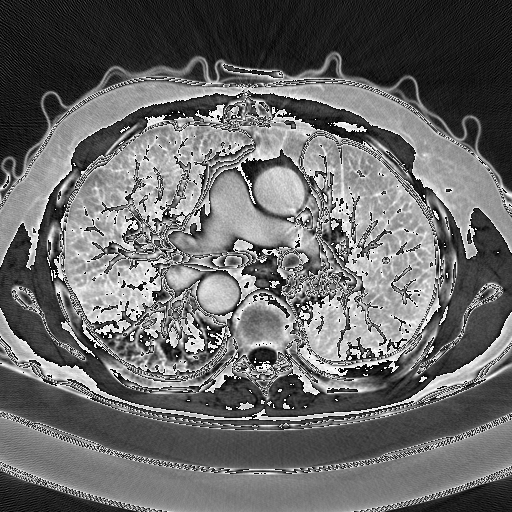

In [22]:
#save the original image as TIFF
image_array_gbr = img_array[..., ::-1]
image_gbr = Image.fromarray(image_array_gbr)
image_gbr.save('converted_tiff.tiff',format='TIFF')
Image.open('/content/converted_tiff.tiff')



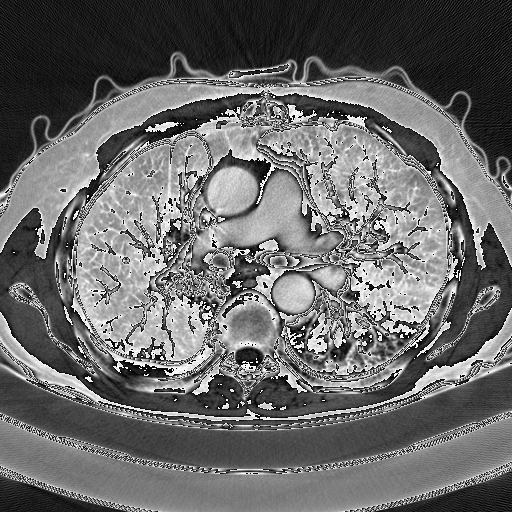

In [23]:
#save the original image as BMP
cv2.imwrite('/content/bmp_image.bmp', img_array)
Image.open('/content/bmp_image.bmp')